<h2><center>California K-12 Public Schools</center></h2>
<h1><center>Meeting the Standards Projection</center></h1>


   <img src='images/shutterstock_213333985.jpeg' width="700">
   
   **Credit:**  [shutterstock](https://www.shutterstock.com/image-photo/school-books-on-desk-education-concept-213333985)


In [86]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings


# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 
import scipy.stats as stats
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_context("poster")
sns.set(style='ticks')

# Modeling
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor

In [2]:
# load file
language = pd.read_csv('data/df_language_with_dummies')
language.head().T

,0,1,2,3,4
School Name,21st Century Learning Institute,A. E. Arnold Elementary,A. G. Cook Elementary,A. G. Currie Middle,A. J. Dorsa Elementary
School Code,129882,6027767,6028211,6085377,6046114
Zip Code,92223,90630,92844,92780,95122
County Name,Riverside,Orange,Orange,Orange,Santa Clara
County Code,33.0,30.0,30.0,30.0,43.0
Latitude,33.962281,33.8249,33.7777,33.7431,37.369388
Longitude,-116.984589,-118.0457,-117.953,-117.8249,-121.83356
Median Household Income,64738.0,84051.0,48345.0,64089.0,57470.0
CAASPP Reported Enrollment,58.0,447.0,192.0,585.0,184.0
CAASPP Reported Enrollment-Dummy,1,1,1,1,1


In [3]:
# copy original df
language_df = language.copy()

In [4]:
# Drop columns not useful in the model
language_df = language_df.drop(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude'], axis=1)

In [5]:
# Overview of the data check all features are numeric
language_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9646 entries, 0 to 9645
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Median Household Income            9646 non-null   float64
 1   CAASPP Reported Enrollment         9646 non-null   float64
 2   CAASPP Reported Enrollment-Dummy   9646 non-null   int64  
 3   Enrollment K-12                    9646 non-null   float64
 4   Enrollment K-12-Dummy              9646 non-null   int64  
 5   Total Revenue per Pupil            9646 non-null   float64
 6   Total Expenditures per Pupil       9646 non-null   float64
 7   Free Meal Count K-12               9646 non-null   float64
 8   Current Expense Per ADA            9646 non-null   float64
 9   Male                               9646 non-null   float64
 10  Male-Dummy                         9646 non-null   int64  
 11  Female                             9646 non-null   float

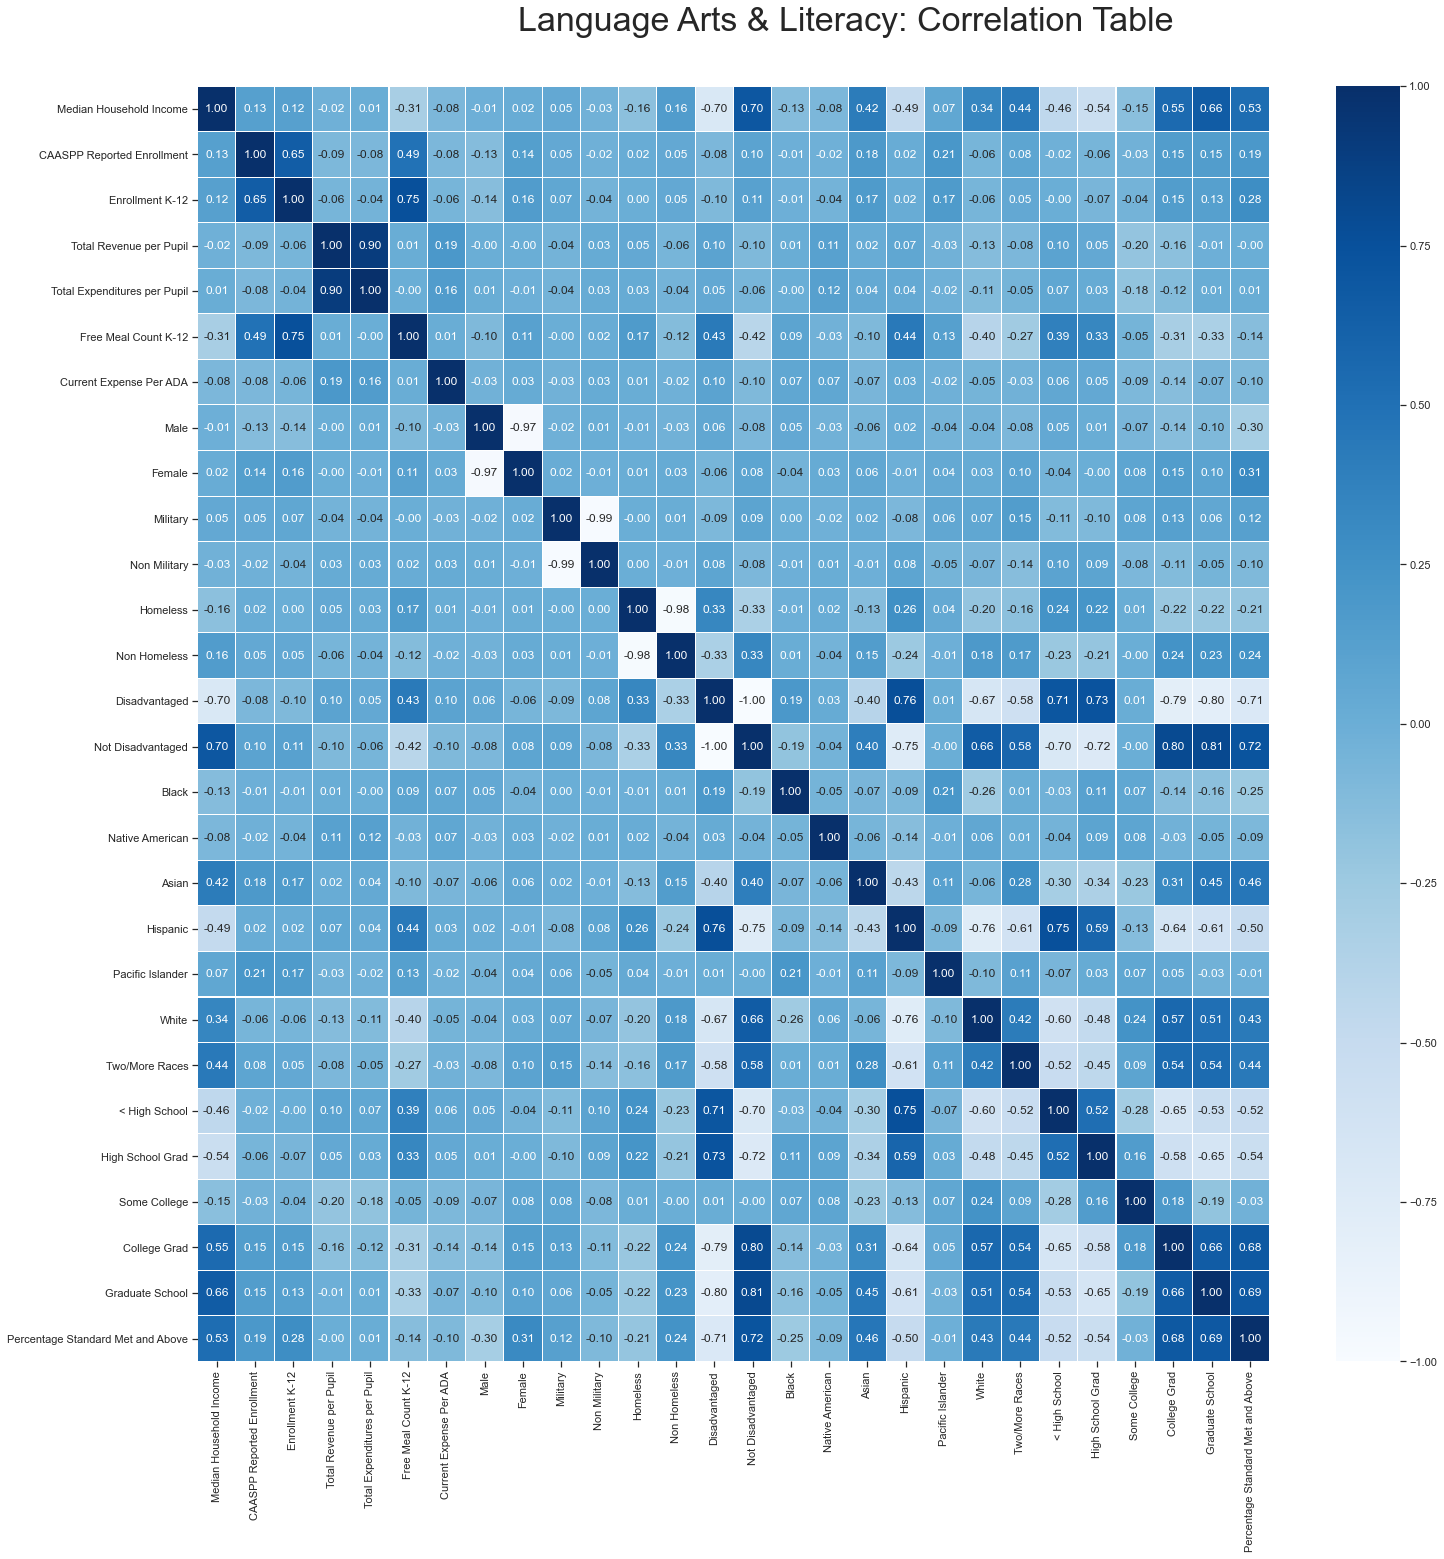

In [6]:
table = language_df[['Median Household Income', 'CAASPP Reported Enrollment','Enrollment K-12',
       'Total Revenue per Pupil','Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female','Military', 'Non Military','Homeless','Non Homeless',
       'Disadvantaged','Not Disadvantaged', 'Black','Native American','Asian','Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad', 'Some College','College Grad',
       'Graduate School','Percentage Standard Met and Above']]

# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, cmap="Blues", ax=ax, fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)

In [7]:
# Dimensions of the dataset 
language_df.shape

(9646, 50)

Text(0, 0.5, 'Number of schools')

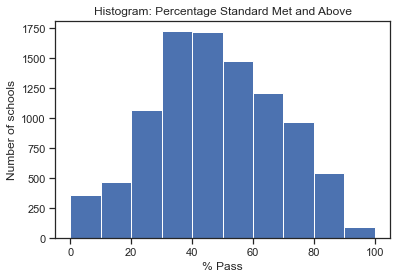

In [8]:
# distrubution of the dependent var
plt.hist(language_df['Percentage Standard Met and Above'])

plt.title("Histogram: Percentage Standard Met and Above")
plt.xlabel("% Pass")
plt.ylabel("Number of schools")

In [9]:
language_df['Percentage Standard Met and Above'].min()

0.0

In [10]:
language_df['Percentage Standard Met and Above'].max()

100.0

# REGRESSION

# MODELING 1

#### Train/Test Split

In [11]:
# dependent variable
y = language_df['Percentage Standard Met and Above']

# Include all columns from data in the explanatory variables X
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

In [12]:
# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [13]:
# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7234, 49) y_train:  (7234,) X_test : (2412, 49) y_test:  (2412,)


## Multiple regression
1. sklearn

- Linear Regression Objects:

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

- Output:

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

In [14]:
# Create linear model
rModel = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales

In [15]:
# Train model call .fit() method of rModel
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [16]:
# Predict on both x train and x test
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

# Evaluate the model call .score() on rModel with parameters X_train, y_train
print(rModel.score(X_train, y_train))

0.7205538514436916


In [17]:
# Access model performance r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.7205538514436916, 0.7146494433367998)

Text(0, 0.5, 'Predicted values')

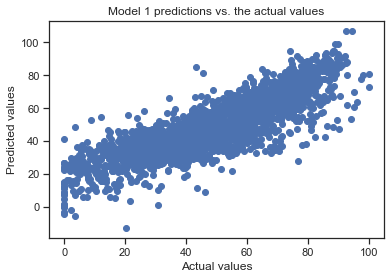

In [18]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test, y_te_pred)

# Label 
plt.title("Model 1 predictions vs. the actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Ordinary Least Square Method (OLS)
2. Statsmodel

#### Train/Test Split

In [19]:
# Create test and train datasets
# Include all columns from data in the explanatory variables X
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = language_df['Percentage Standard Met and Above']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [20]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7234, 49) y_train:  (7234,) X_test : (2412, 49) y_test:  (2412,)


In [21]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel2 = sm.OLS(y_train, X_train)
# Fit the model
rModel2_results = rModel2.fit()

In [22]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.721
Model:                                           OLS   Adj. R-squared:                  0.719
Method:                                Least Squares   F-statistic:                     395.1
Date:                               Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                                       18:13:05   Log-Likelihood:                -27502.
No. Observations:                               7234   AIC:                         5.510e+04
Df Residuals:                                   7186   BIC:                         5.543e+04
Df Model:                                         47                                         
Covariance Type:                           nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Median Household Income          -2.016e-05    7.9e-06     -2.550      0.011   -3.56e-05   -4.66e-06
CAASPP Reported Enrollment          -0.0051      0.001     -7.110      0.000      -0.007      -0.004
CAASPP Reported Enrollment-Dummy   -60.3037     16.201     -3.722      0.000     -92.063     -28.544
Enrollment K-12                      0.0047      0.001      7.881      0.000       0.004       0.006
Enrollment K-12-Dummy               13.2168      1.795      7.363      0.000       9.698      16.735
Total Revenue per Pupil              0.0006   8.83e-05      7.095      0.000       0.000       0.001
Total Expenditures per Pupil        -0.0002   8.28e-05     -1.971      0.049      -0.000   -8.94e-07
Free Meal Count K-12                 0.0027      0.001      2.369      0.018       0.000       0.005
Current Expense Per ADA          -4.772e-05   3.07e-05     -1.556      0.120      -0.000    1.24e-05
Male                                -0.2690      0.132     -2.045      0.041      -0.527      -0.011
Male-Dummy                          24.5830      4.010      6.130      0.000      16.722      32.445
Female                               0.2392      0.133      1.802      0.072      -0.021       0.499
Female-Dummy                        -2.9176      2.646     -1.102      0.270      -8.105       2.270
Military                             0.6336      0.300      2.109      0.035       0.045       1.223
Military-Dummy                       0.8921      0.523      1.707      0.088      -0.132       1.916
Non Military                         0.5501      0.300      1.835      0.067      -0.038       1.138
Non Military-Dummy                 -60.3037     16.201     -3.722      0.000     -92.063     -28.544
Homeless                             0.6488      0.119      5.432      0.000       0.415       0.883
Homeless-Dummy                      -1.0279      0.373     -2.754      0.006      -1.759      -0.296
Non Homeless                         0.6877      0.118      5.817      0.000       0.456       0.919
Non Homeless-Dummy                 -27.1743      6.107     -4.450      0.000     -39.145     -15.204
Disadvantaged                        0.0727      0.090      0.804      0.422      -0.105       0.250
Disadvantaged-Dummy                 -2.3862      1.854     -1.287      0.198      -6.020       1.248
Not Disadvantaged                    0.2897      0.091      3.201      0.001       0.112       0.467
Not Disadvantaged-Dummy             -2.5699      1.090     -2.358      0.018      -4.706      -0.433
Black                               -0.0351      0.031     -1.121      0.262      -0.096  

In [23]:
# Make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)


Text(0, 0.5, 'Predicted values')

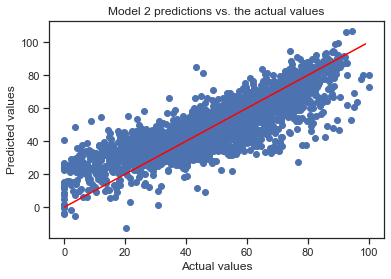

In [24]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? 
plt.plot([x for x in range(0,100)],[x for x in range(0,100)], color='red')

# Label 
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Model Performance
- MAE
- MSE
- RMSE
- R_squared

In [25]:
# Define a function to check the RMSE
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())

In [26]:
median_mae = mean_absolute_error(y_test, y_pred)
median_mae

8.507461195812601

In [27]:
# MSE - train, test
median_mse = mean_squared_error(y_test, y_pred)
median_mse

126.24844007906644

In [28]:
median_rmse = mean_squared_error(y_test, y_pred, squared=False)
median_rmse

11.236033111337223

In [29]:
median_r2 = r2_score(y_test, y_pred)
median_r2


0.7149667683705045

# MODELING 2

#### Train/Test Split

- Drop highly correlated variables

In [30]:
# dependent variable
y = language_df['Percentage Standard Met and Above']

# Include all columns from data in the explanatory variables X
X = language_df.drop(['Percentage Standard Met and Above', 'Male', 'Male-Dummy','Non Military',
       'Non Military-Dummy', 'Non Homeless', 'Total Expenditures per Pupil',
       'Non Homeless-Dummy', 'Not Disadvantaged', 'Not Disadvantaged-Dummy'], axis=1)

In [31]:
# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [32]:
# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7234, 40) y_train:  (7234,) X_test : (2412, 40) y_test:  (2412,)


## Multiple regression
1. sklearn

In [33]:
# Create linear model
rModel = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales


In [34]:
# Train model call .fit() method of rModel
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [35]:
# Predict on both x train and x test
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

# Evaluate the model call .score() on rModel with parameters X_train, y_train
print(rModel.score(X_train, y_train))

0.7165948804897219


In [36]:
# Access model performance r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.7165948804897219, 0.7114899359086679)

Text(0, 0.5, 'Predicted values')

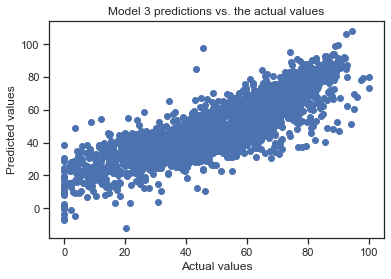

In [37]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test, y_te_pred)

# Label 
plt.title("Model 3 predictions vs. the actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Ordinary Least Square Method (OLS)
2. Statsmodel

#### Train/Test Split

In [38]:
# Create test and train datasets
# Include the columns below from data in the explanatory variables X 
X = language_df.drop(['Percentage Standard Met and Above', 'Male', 'Male-Dummy','Non Military',
       'Non Military-Dummy', 'Non Homeless', 'Total Expenditures per Pupil',
       'Non Homeless-Dummy', 'Not Disadvantaged', 'Not Disadvantaged-Dummy'], axis=1)

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = language_df['Percentage Standard Met and Above']

In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)


X_train:  (7234, 40) y_train:  (7234,) X_test : (2412, 40) y_test:  (2412,)


In [40]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel2 = sm.OLS(y_train, X_train)

In [41]:
# Fit the model
rModel2_results = rModel2.fit()

rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.717
Model:                                           OLS   Adj. R-squared:                  0.715
Method:                                Least Squares   F-statistic:                     466.4
Date:                               Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                                       18:13:06   Log-Likelihood:                -27558.
No. Observations:                               7234   AIC:                         5.520e+04
Df Residuals:                                   7194   BIC:                         5.547e+04
Df Model:                                         39                                         
Covariance Type:                           nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Median Household Income          -2.048e-05   7.96e-06     -2.574      0.010   -3.61e-05   -4.88e-06
CAASPP Reported Enrollment          -0.0050      0.001     -6.924      0.000      -0.006      -0.004
CAASPP Reported Enrollment-Dummy    -3.4164      3.006     -1.136      0.256      -9.309       2.477
Enrollment K-12                      0.0048      0.001      8.001      0.000       0.004       0.006
Enrollment K-12-Dummy               12.6218      1.797      7.023      0.000       9.099      16.145
Total Revenue per Pupil              0.0005    4.2e-05     10.945      0.000       0.000       0.001
Free Meal Count K-12                 0.0027      0.001      2.407      0.016       0.001       0.005
Current Expense Per ADA          -4.028e-05   3.09e-05     -1.305      0.192      -0.000    2.02e-05
Female                               0.4783      0.023     21.183      0.000       0.434       0.523
Female-Dummy                        -4.5524      1.765     -2.579      0.010      -8.013      -1.092
Military                             0.0850      0.029      2.911      0.004       0.028       0.142
Military-Dummy                       1.3531      0.453      2.988      0.003       0.465       2.241
Homeless                            -0.0027      0.023     -0.115      0.908      -0.048       0.043
Homeless-Dummy                      -0.5069      0.353     -1.438      0.151      -1.198       0.184
Disadvantaged                       -0.2186      0.014    -15.087      0.000      -0.247      -0.190
Disadvantaged-Dummy                 -1.2686      1.767     -0.718      0.473      -4.732       2.195
Black                               -0.0082      0.031     -0.264      0.792      -0.070       0.053
Black-Dummy                         -0.2658      0.360     -0.739      0.460      -0.971       0.439
Native American                     -0.0609      0.046     -1.321      0.187      -0.151       0.029
Native American-Dummy               -1.6304      0.488     -3.344      0.001      -2.586      -0.675
Asian                                0.4856      0.030     16.421      0.000       0.428       0.544
Asian-Dummy                          2.1147      0.366      5.773      0.000       1.397       2.833
Hispanic                             0.2928      0.027     10.739      0.000       0.239       0.346
Hispanic-Dummy                      -4.1666      1.318     -3.162      0.002      -6.750      -1.584
Pacific Islander                    -0.6046      0.171     -3.528      0.000      -0.941      -0.269
Pacific Islander-Dummy               0.5918      0.581      1.019      0.308      -0.547  

In [42]:
# Make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)


Text(0, 0.5, 'Predicted values')

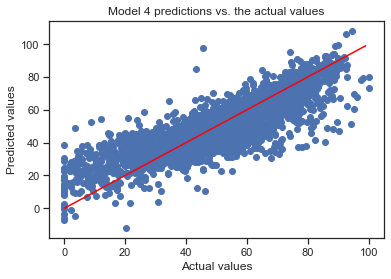

In [43]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? 
plt.plot([x for x in range(0,100)],[x for x in range(0,100)], color='red')

# Label 
plt.title("Model 4 predictions vs. the actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Model Performance
- MAE
- MSE
- RMSE
- R_squared

In [44]:
# MAE
median_mae = mean_absolute_error(y_test, y_pred)
median_mae


8.5576399841558

In [45]:
# MSE - train, test
median_mse = mean_squared_error(y_test, y_pred)
median_mse

127.78841726775137

In [46]:
median_rmse = mean_squared_error(y_test, y_pred, squared=False)
median_rmse

11.304353907577

In [47]:
# R_squared
median_r2 = r2_score(y_test, y_pred)
median_r2

0.7114899359086406

# MODELING 3

#### Train/Test Split

- Drop highly correlated variables and dummy columns

In [48]:
df = table.copy()
df

,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,Free Meal Count K-12,Current Expense Per ADA,Male,Female,Military,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,64738.0,58.0,88.0,12626.0,14449.0,41.0,11384.420846,44.83,55.17,-1.0,...,56.90,-1.00,31.03,-1.00,10.34,22.41,37.93,15.52,6.90,44.64
1,84051.0,447.0,739.0,13641.0,11589.0,246.0,10758.663825,52.13,47.87,0.0,...,29.31,0.00,24.83,1.57,3.36,9.84,19.02,30.87,27.07,65.60
2,48345.0,192.0,366.0,14695.0,16663.0,187.0,12964.447700,44.79,55.21,12.5,...,22.40,-1.00,5.21,3.12,0.00,6.77,7.29,17.19,3.12,81.18
3,64089.0,585.0,611.0,13166.0,12601.0,422.0,10744.324251,52.82,47.18,-1.0,...,90.94,0.00,2.56,0.00,38.12,28.72,14.02,6.67,2.56,30.38
4,57470.0,184.0,371.0,14788.0,15286.0,262.0,15524.553854,50.00,50.00,-1.0,...,90.22,-1.00,0.00,0.00,44.57,29.89,13.04,8.15,0.00,29.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,89403.0,52.0,73.0,3811.0,3425.0,28.0,14260.002822,36.54,63.46,-1.0,...,26.92,-1.00,42.31,0.00,0.00,0.00,21.15,34.62,23.08,50.00
9642,105659.0,64.0,119.0,3811.0,3425.0,35.0,14260.002822,56.25,43.75,0.0,...,37.50,-1.00,46.88,14.06,-1.00,0.00,26.56,25.00,15.62,37.93
9643,94173.0,405.0,702.0,15219.0,15708.0,373.0,12964.578388,46.17,53.83,-1.0,...,8.89,1.98,40.99,8.15,-1.00,2.22,6.17,4.44,1.23,38.84
9644,42404.0,184.0,509.0,14107.0,14225.0,414.0,12983.994377,41.30,58.70,-1.0,...,60.87,0.00,8.70,7.07,34.24,25.54,19.02,5.43,4.89,6.15


## Ordinary Least Square Method (OLS)
1. Statsmodel

In [49]:
# Create test and train datasets
# Include all columns from data in the explanatory variables X
X = df.drop(['Percentage Standard Met and Above', 'Male', 'Non Military',
       'Non Homeless', 'Total Expenditures per Pupil', 'Not Disadvantaged'], axis=1)

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = df['Percentage Standard Met and Above']

In [50]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)


In [51]:
# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)


X_train:  (7234, 23) y_train:  (7234,) X_test : (2412, 23) y_test:  (2412,)


In [52]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel2 = sm.OLS(y_train, X_train)

In [53]:
# Fit the model
rModel2_results = rModel2.fit()

rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.708
Model:                                           OLS   Adj. R-squared:                  0.707
Method:                                Least Squares   F-statistic:                     793.6
Date:                               Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                                       18:13:06   Log-Likelihood:                -27670.
No. Observations:                               7234   AIC:                         5.539e+04
Df Residuals:                                   7211   BIC:                         5.554e+04
Df Model:                                         22                                         
Covariance Type:                           nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.4197      2.425     -1.822      0.068      -9.174       0.334
Median Household Income     -1.78e-05   7.94e-06     -2.243      0.025   -3.34e-05   -2.24e-06
CAASPP Reported Enrollment    -0.0052      0.001     -7.880      0.000      -0.007      -0.004
Enrollment K-12                0.0050      0.001      8.900      0.000       0.004       0.006
Total Revenue per Pupil        0.0005   4.23e-05     11.448      0.000       0.000       0.001
Free Meal Count K-12           0.0029      0.001      2.812      0.005       0.001       0.005
Current Expense Per ADA    -3.787e-05   3.12e-05     -1.213      0.225    -9.9e-05    2.33e-05
Female                         0.4983      0.018     27.604      0.000       0.463       0.534
Military                       0.1279      0.026      4.950      0.000       0.077       0.179
Homeless                      -0.0204      0.021     -0.997      0.319      -0.061       0.020
Disadvantaged                 -0.1984      0.014    -14.245      0.000      -0.226      -0.171
Black                         -0.0096      0.027     -0.355      0.723      -0.063       0.043
Native American               -0.1007      0.043     -2.338      0.019      -0.185      -0.016
Asian                          0.5013      0.026     19.166      0.000       0.450       0.553
Hispanic                       0.3002      0.024     12.712      0.000       0.254       0.347
Pacific Islander              -0.4551      0.127     -3.577      0.000      -0.704      -0.206
White                          0.2477      0.024     10.445      0.000       0.201       0.294
Two/More Races                 0.2166      0.044      4.976      0.000       0.131       0.302
< High School                 -0.1614      0.016    -10.338      0.000      -0.192      -0.131
High School Grad              -0.0545      0.017     -3.276      0.001      -0.087      -0.022
Some College                   0.0206      0.016      1.292      0.196      -0.011       0.052
College Grad                   0.3645      0.019     19.673      0.000       0.328       0.401
Graduate School                0.2563      0.017     14.840      0.000       0.222       0.290
==============================================================================
Omnibus:                      311.563   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.239
Skew:                           0.260   Prob(JB):                    8.93e-158
Kurtosis:                       4.459   Cond. No.                     1.30e+06
=====================================================

In [54]:
# Make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)

Text(0, 0.5, 'Predicted values')

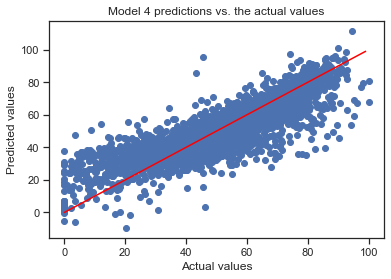

In [55]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? 
plt.plot([x for x in range(0,100)],[x for x in range(0,100)], color='red')

# Label 
plt.title("Model 4 predictions vs. the actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [56]:
y_pred

207     36.739087
4397    36.843055
9309    36.426618
5207    74.909590
6344    49.098881
          ...    
5799    41.183752
429     26.657422
4641    31.003212
2874    72.828635
5442    48.388344
Length: 2412, dtype: float64

## Model Performance
- MAE
- MSE
- RMSE
- R_squared

In [57]:
# MAE
median_mae = mean_absolute_error(y_test, y_pred)
median_mae

8.725467831213454

In [58]:
# MSE - train, test
median_mse = mean_squared_error(y_test, y_pred)
median_mse


132.79662526918833

In [59]:
median_rmse = mean_squared_error(y_test, y_pred, squared=False)
median_rmse

11.523741808509437

In [60]:
# R_squared
median_r2 = r2_score(y_test, y_pred)
median_r2

0.7001828202688097

Text(0, 0.5, 'Number of schools')

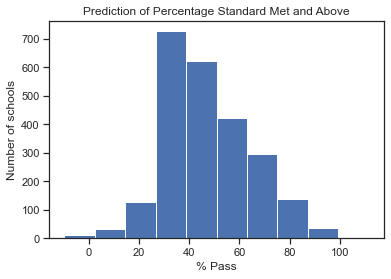

In [61]:
plt.hist(y_pred)

plt.title("Prediction of Percentage Standard Met and Above")
plt.xlabel("% Pass")
plt.ylabel("Number of schools")

# Feature Selection
### Refining Linear Model
- sklearn, SelectKBest

### Select features using SelectKBest function

In [62]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [63]:
# Create test and train datasets
# exclude the columns below as the explanatory variables X 
X = language_df.drop(['Percentage Standard Met and Above', 'Male', 'Male-Dummy','Non Military',
       'Non Military-Dummy', 'Non Homeless', 'Total Expenditures per Pupil',
       'Non Homeless-Dummy', 'Not Disadvantaged', 'Not Disadvantaged-Dummy'], axis=1)

y = language_df['Percentage Standard Met and Above']

Feature 0: 2852.387702
Feature 1: 287.024966
Feature 2: nan
Feature 3: 595.059137
Feature 4: 99.953183
Feature 5: 0.074157
Feature 6: 157.629580
Feature 7: 64.621428
Feature 8: 734.604498
Feature 9: 265.079053
Feature 10: 89.844446
Feature 11: 307.194365
Feature 12: 320.030793
Feature 13: 284.854807
Feature 14: 7527.551048
Feature 15: 62.090308
Feature 16: 522.288948
Feature 17: 4.573524
Feature 18: 61.710640
Feature 19: 5.917254
Feature 20: 1911.930615
Feature 21: 1580.395711
Feature 22: 2427.337081
Feature 23: 25.455862
Feature 24: 2.362709
Feature 25: 0.179406
Feature 26: 1662.871821
Feature 27: 635.550658
Feature 28: 1778.597700
Feature 29: 1381.762728
Feature 30: 2792.614968
Feature 31: 763.331773
Feature 32: 3068.735006
Feature 33: 66.202592
Feature 34: 2.729598
Feature 35: 107.213308
Feature 36: 6427.712911
Feature 37: 842.090250
Feature 38: 6742.988581
Feature 39: 1530.608789


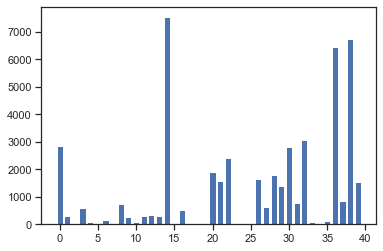

In [64]:
# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [65]:
# Create linear model
rModel3 = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales

rModel3.fit(X_train, y_train)
# evaluate the model
yhat = rModel3.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 8.558


### Select features using SelectKBest pipeline
- Refine number of features

In [66]:
# Add SelectKBest as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression, k='all'),
    LinearRegression()
)

In [67]:
# FFit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7fc60c38c320>)),
                ('linearregression', LinearRegression())])

In [68]:
# Assess performance
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [69]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7165947529314785, 0.7114898499806217)

In [70]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.309459897627246, 8.557535867937661)

# Cross Validation 
### Assess performance

In [71]:
cv_results = cross_validate(pipe, X_train, y_train, cv=10)

In [72]:
cv_scores = cv_results['test_score']
cv_scores

array([0.72012598, 0.66461887, 0.73137144, 0.70606304, 0.69626078,
       0.73372446, 0.71825631, 0.71839117, 0.71208223, 0.71368179])

In [73]:
np.mean(cv_scores), np.std(cv_scores)

(0.7114576082880368, 0.018764487479232643)

In [74]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.67, 0.75])

# GridSearchCV
### Hyperparameter search

In [75]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [120]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [121]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=10, n_jobs=-1)

In [122]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x7fc60c38c320>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [123]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [124]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 40}

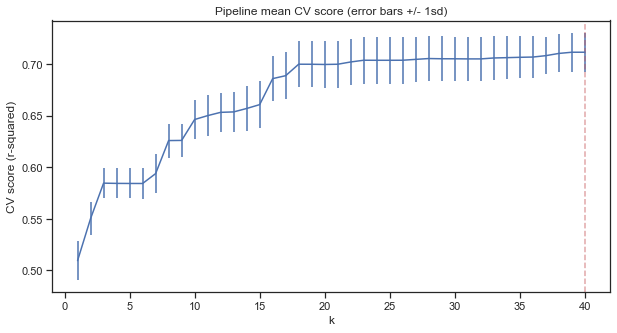

In [125]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [126]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [127]:
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

CAASPP Reported Enrollment-Dummy    1.802190e+13
Hispanic                            8.476629e+00
Asian                               6.473229e+00
White                               6.209292e+00
College Grad                        3.701451e+00
Female                              3.640840e+00
Graduate School                     3.233616e+00
Enrollment K-12                     2.609302e+00
Total Revenue per Pupil             1.513352e+00
Two/More Races                      1.131030e+00
Asian-Dummy                         1.036964e+00
Enrollment K-12-Dummy               1.024970e+00
College Grad-Dummy                  9.415084e-01
Free Meal Count K-12                8.470396e-01
Graduate School-Dummy               7.625887e-01
Military-Dummy                      4.705125e-01
Military                            4.386985e-01
Some College                        2.599035e-01
Pacific Islander-Dummy              1.934884e-01
High School Grad-Dummy              4.837209e-02
Homeless            

In [128]:
X

,Median Household Income,CAASPP Reported Enrollment,CAASPP Reported Enrollment-Dummy,Enrollment K-12,Enrollment K-12-Dummy,Total Revenue per Pupil,Free Meal Count K-12,Current Expense Per ADA,Female,Female-Dummy,...,< High School,< High School-Dummy,High School Grad,High School Grad-Dummy,Some College,Some College-Dummy,College Grad,College Grad-Dummy,Graduate School,Graduate School-Dummy
0,64738.0,58.0,1,88.0,1,12626.0,41.0,11384.420846,55.17,1,...,10.34,1,22.41,1,37.93,1,15.52,1,6.90,1
1,84051.0,447.0,1,739.0,1,13641.0,246.0,10758.663825,47.87,1,...,3.36,1,9.84,1,19.02,1,30.87,1,27.07,1
2,48345.0,192.0,1,366.0,1,14695.0,187.0,12964.447700,55.21,1,...,0.00,0,6.77,1,7.29,1,17.19,1,3.12,1
3,64089.0,585.0,1,611.0,1,13166.0,422.0,10744.324251,47.18,1,...,38.12,1,28.72,1,14.02,1,6.67,1,2.56,1
4,57470.0,184.0,1,371.0,1,14788.0,262.0,15524.553854,50.00,1,...,44.57,1,29.89,1,13.04,1,8.15,1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,89403.0,52.0,1,73.0,1,3811.0,28.0,14260.002822,63.46,1,...,0.00,0,0.00,0,21.15,1,34.62,1,23.08,1
9642,105659.0,64.0,1,119.0,1,3811.0,35.0,14260.002822,43.75,1,...,-1.00,0,0.00,0,26.56,1,25.00,1,15.62,1
9643,94173.0,405.0,1,702.0,1,15219.0,373.0,12964.578388,53.83,1,...,-1.00,0,2.22,1,6.17,1,4.44,1,1.23,1
9644,42404.0,184.0,1,509.0,1,14107.0,414.0,12983.994377,58.70,1,...,34.24,1,25.54,1,19.02,1,5.43,1,4.89,1


# LASSO

# RANDOM FOREST

In [129]:
# exclude the columns below as the explanatory variables X 
X = language_df.drop(['Percentage Standard Met and Above', 'Male', 'Male-Dummy','Non Military',
       'Non Military-Dummy', 'Non Homeless', 'Total Expenditures per Pupil',
       'Non Homeless-Dummy', 'Not Disadvantaged', 'Not Disadvantaged-Dummy'], axis=1)

y = language_df['Percentage Standard Met and Above']

In [130]:
# RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [131]:
# 10-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=10)

In [132]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.75356422, 0.71953916, 0.7555744 , 0.75236065, 0.72267707,
       0.75222962, 0.7540604 , 0.75886727, 0.73797316, 0.76794189])

In [133]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7474787849303391, 0.014922577268393937)

In [137]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [140]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [142]:
#rf_grid_cv.fit(X_train, y_train)

In [ ]:
rf_grid_cv.best_params_

In [ ]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

In [ ]:
np.mean(rf_best_scores), np.std(rf_best_scores)

In [ ]:
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

# GRADIENT BOOSTING

# LOGISTIC REGRESSION

## Cross Validation
- Performance Evaluation

Cross validation is a technique for assessing how the statistical analysis generalises to an independent data set.It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data. Using cross-validation, there are high chances that we can detect over-fitting with ease

## Confusion Matrix
- Access classification model performance